In [1]:
import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


# Case Study Of Air Pollution

### Import Data

In [2]:
df=pd.read_excel(r"C:\Users\prati\Desktop\Python\Machine Learning'\Assignment\AirPollution.xls")
df=df.drop(['Site','Date','Season'],axis=1)
df

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23
...,...,...,...,...,...,...,...,...
146,40.13,0.10,0.00,0.04,0.09,0,18.88,10.09
147,40.38,0.10,0.00,0.03,0.09,0,47.56,24.14
148,31.28,0.11,0.00,0.02,0.05,0,31.53,26.64
149,52.10,0.48,0.00,0.04,0.06,0,42.08,22.95


### Data Type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    151 non-null    float64
 1   Pb      151 non-null    float64
 2   Cd      151 non-null    float64
 3   Cu      151 non-null    float64
 4   Cr      151 non-null    float64
 5   Zn      151 non-null    int64  
 6   NOx     151 non-null    float64
 7   SO2     151 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 9.6 KB


### Uni-Variate Analysis

In [4]:
df.describe()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.0,151.000000,151.000000
mean,68.536026,0.716358,0.000265,0.331854,0.390066,0.0,42.692914,22.359868
std,40.908548,0.673069,0.001982,0.408259,0.434575,0.0,23.101723,10.393498
min,16.240000,0.000000,0.000000,0.000000,0.000000,0.0,8.260000,0.000000
25%,37.005000,0.220000,0.000000,0.040000,0.085000,0.0,25.735000,15.165000
50%,59.610000,0.570000,0.000000,0.130000,0.230000,0.0,37.000000,20.930000
75%,89.820000,0.965000,0.000000,0.535000,0.580000,0.0,54.695000,27.420000
max,194.740000,3.490000,0.020000,1.650000,3.220000,0.0,121.460000,53.270000


### EDA

#### Identify and treament of outlier

<AxesSubplot:>

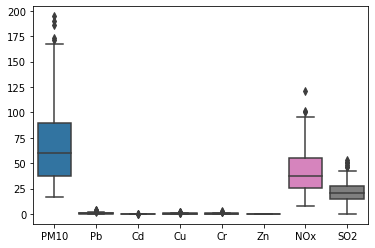

In [5]:
sns.boxplot(data=df)

In [6]:
df.columns

Index(['PM10', 'Pb', 'Cd', 'Cu', 'Cr', 'Zn', 'NOx', 'SO2'], dtype='object')

### Winsorizing Technique- Treatment of outlier

In [7]:
def treat_outliers(df):
    for i in df.columns:    
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper_limit=q3+1.5*iqr
        lower_limit=q1-1.5*iqr
        if ((df[i].dtype=='float64') | (df[i].dtype=='int64')):
            df[i][df[i]<= lower_limit] = lower_limit
            df[i][df[i]>= upper_limit] = upper_limit
        else:
            df[i]=df[i]
    return df
        
treat_outliers(df)    

C:\Users\prati\AppData\Local\Temp/ipykernel_4916/3821370671.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<= lower_limit] = lower_limit
C:\Users\prati\AppData\Local\Temp/ipykernel_4916/3821370671.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>= upper_limit] = upper_limit


,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
0,120.71,2.0825,0.0,0.53,0.6100,0,84.17,40.3700
1,140.25,2.0825,0.0,0.10,0.9100,0,88.81,39.4800
2,107.01,1.3100,0.0,0.19,0.4800,0,81.49,45.8025
3,88.81,0.7600,0.0,0.33,0.3900,0,61.80,27.4200
4,75.05,0.6000,0.0,0.41,1.3225,0,48.71,19.2300
...,...,...,...,...,...,...,...,...
146,40.13,0.1000,0.0,0.04,0.0900,0,18.88,10.0900
147,40.38,0.1000,0.0,0.03,0.0900,0,47.56,24.1400
148,31.28,0.1100,0.0,0.02,0.0500,0,31.53,26.6400
149,52.10,0.4800,0.0,0.04,0.0600,0,42.08,22.9500


<AxesSubplot:>

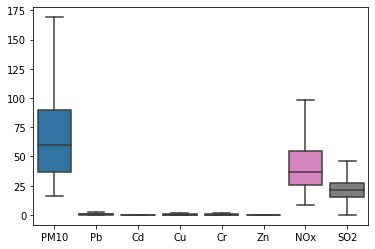

In [8]:
sns.boxplot(data=df)

In [9]:
df.describe()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
count,151.00000,151.000000,151.0,151.000000,151.000000,151.0,151.000000,151.000000
mean,68.06856,0.679983,0.0,0.327053,0.372848,0.0,42.501755,22.226656
std,39.61346,0.560941,0.0,0.395327,0.361985,0.0,22.551657,10.049931
min,16.24000,0.000000,0.0,0.000000,0.000000,0.0,8.260000,0.000000
25%,37.00500,0.220000,0.0,0.040000,0.085000,0.0,25.735000,15.165000
50%,59.61000,0.570000,0.0,0.130000,0.230000,0.0,37.000000,20.930000
75%,89.82000,0.965000,0.0,0.535000,0.580000,0.0,54.695000,27.420000
max,169.04250,2.082500,0.0,1.277500,1.322500,0.0,98.135000,45.802500


In [10]:
df.isna().sum()

PM10    0
Pb      0
Cd      0
Cu      0
Cr      0
Zn      0
NOx     0
SO2     0
dtype: int64

# Splitting the data into trained and test data set

* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [11]:
df.head()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
0,120.71,2.0825,0.0,0.53,0.6100,0,84.17,40.3700
1,140.25,2.0825,0.0,0.10,0.9100,0,88.81,39.4800
2,107.01,1.3100,0.0,0.19,0.4800,0,81.49,45.8025
3,88.81,0.7600,0.0,0.33,0.3900,0,61.80,27.4200
4,75.05,0.6000,0.0,0.41,1.3225,0,48.71,19.2300


In [12]:
X= df.drop(['PM10','Cd','Zn'],axis=1)

y= df[['PM10']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=250)

In [13]:
d1=pd.concat([X_train,y_train],axis=1)
d1.head()

,Pb,Cu,Cr,NOx,SO2,PM10
94,0.84,0.21,0.78,38.41,17.84,101.46
131,0.11,0.22,0.19,21.46,17.72,35.88
16,0.34,0.01,0.04,21.41,10.15,41.05
21,0.99,0.84,0.73,95.96,26.30,95.38
138,0.00,0.00,0.00,26.75,16.38,28.97


# Correlation Matrix

In [14]:
d1.corr()

,Pb,Cu,Cr,NOx,SO2,PM10
Pb,1.000000,0.686375,0.788004,0.714193,0.614465,0.880196
Cu,0.686375,1.000000,0.793502,0.487378,0.438655,0.713121
Cr,0.788004,0.793502,1.000000,0.521028,0.497571,0.846539
NOx,0.714193,0.487378,0.521028,1.000000,0.830826,0.605654
SO2,0.614465,0.438655,0.497571,0.830826,1.000000,0.551062
PM10,0.880196,0.713121,0.846539,0.605654,0.551062,1.000000


<AxesSubplot:>

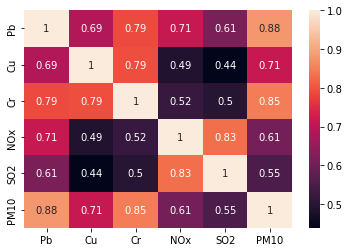

In [15]:
sns.heatmap(d1.corr(),annot=True)

<AxesSubplot:title={'center':'Relationship between Pb and PM10'}, xlabel='Pb', ylabel='PM10'>

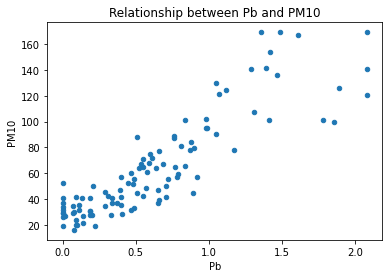

In [16]:
d1.plot.scatter(x='Pb',y='PM10',title='Relationship between Pb and PM10')

#### Pb have 88% strong positive relationship between Pb and PM10

* Pb has high contribution to PM10
* There is no collinearity

### Multicolinearity (with the help of VIF)

In [17]:
X1= d1.drop('PM10',axis=1)

series_before=pd.Series([variance_inflation_factor(X1.values,i)
                         for i in range(X1.shape[1])],
                         index=X1.columns)
series_before

Pb      9.725844
Cu      4.919229
Cr      8.311351
NOx    20.672414
SO2    16.521016
dtype: float64

* There is Collinearity in the data, As VIF > 10
* We remove collinearity 

In [18]:
X1.values

array([[8.40000e-01, 2.10000e-01, 7.80000e-01, 3.84100e+01, 1.78400e+01],
       [1.10000e-01, 2.20000e-01, 1.90000e-01, 2.14600e+01, 1.77200e+01],
       [3.40000e-01, 1.00000e-02, 4.00000e-02, 2.14100e+01, 1.01500e+01],
       [9.90000e-01, 8.40000e-01, 7.30000e-01, 9.59600e+01, 2.63000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 2.67500e+01, 1.63800e+01],
       [7.10000e-01, 1.30000e-01, 3.00000e-01, 2.54700e+01, 1.98000e+01],
       [5.80000e-01, 7.70000e-01, 5.70000e-01, 2.44700e+01, 1.36100e+01],
       [8.80000e-01, 8.70000e-01, 5.60000e-01, 5.28900e+01, 2.09300e+01],
       [6.50000e-01, 7.00000e-02, 2.20000e-01, 6.32200e+01, 3.51200e+01],
       [3.90000e-01, 0.00000e+00, 5.00000e-02, 3.69600e+01, 1.21600e+01],
       [8.00000e-02, 1.30000e-01, 7.00000e-02, 5.76100e+01, 2.25200e+01],
       [9.80000e-01, 8.10000e-01, 9.10000e-01, 5.36700e+01, 3.09100e+01],
       [5.40000e-01, 2.60000e-01, 3.10000e-01, 1.85100e+01, 1.52000e+01],
       [4.00000e-01, 1.90000e-01, 2.00

In [19]:
X1.shape[1]

5

In [20]:
X.columns

Index(['Pb', 'Cu', 'Cr', 'NOx', 'SO2'], dtype='object')

# Model Building

* Ho:- There is no Linear relationship between PM10 and Pb,Cu,Cr,NOx,SO2.
* Vs.
* H1:- There is Linear relationship between PM10 and Pb,Cu,Cr,NOx,SO2.
* Alpha:- 0.05    

In [21]:
import statsmodels.formula.api as smf
model = smf.ols('PM10 ~ Pb+Cu+Cr+NOx+SO2',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     135.0
Date:                Sun, 22 May 2022   Prob (F-statistic):           1.02e-52
Time:                        22:28:03   Log-Likelihood:                -638.53
No. Observations:                 151   AIC:                             1289.
Df Residuals:                     145   BIC:                             1307.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.7004      3.390      6.695      0.000      15.999      29.401
Pb            34.5829      4.690      7.374      0.000      25.314      43.852
Cu             6.4346      5.908      1.089      0.278      -5.242      18.112
Cr            42.6691      7.519      5.675      0.000      27.809      57.529
NOx           -0.0380      0.133     -0.286      0.775      -0.301       0.225
SO2            0.2454      0.274      0.895      0.372      -0.296       0.787
==============================================================================
Omnibus:                       13.106   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.950
Skew:                           0.565   Prob(JB):                     0.000344
Kurtosis:                       4.121   Cond. No.                         340.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is Linear relationship between PM10 and Pb,Cr
* There is no Linear relationship between PM10 and Cu,NOx,SO2.
  * So we will remove and rerun the model
* 82% Accuracy of model, so we say model is good fit    

In [22]:
import statsmodels.formula.api as smf
model2 = smf.ols('PM10 ~ Pb+Cr',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     337.4
Date:                Sun, 22 May 2022   Prob (F-statistic):           7.33e-56
Time:                        22:28:03   Log-Likelihood:                -639.79
No. Observations:                 151   AIC:                             1286.
Df Residuals:                     148   BIC:                             1295.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.1845      2.175     11.580      0.000      20.887      29.482
Pb            36.6917      3.947      9.297      0.000      28.893      44.491
Cr            48.1008      6.116      7.865      0.000      36.015      60.186
==============================================================================
Omnibus:                       13.363   Durbin-Watson:                   1.036
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.136
Skew:                           0.477   Prob(JB):                     4.24e-05
Kurtosis:                       4.513   Cond. No.                         6.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is Linear relationship between PM10 and Pb,Cr
* 82% Accuracy of model, So model is good fit
* y= 25.1845+ 36.6917* Pb +48.1008* Cr

# Multicollinearity (with the help of VIF)

In [32]:
X1=d1.loc[:,['Pb', 'Cr']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

Pb    5.469255
Cr    5.469255
dtype: float64

## Assumption of Model

* Linearity
* Homoscedasicity
* Normality
* Error has to be independently identificaly normally distributed

In [24]:
d1.head()

,Pb,Cu,Cr,NOx,SO2,PM10
94,0.84,0.21,0.78,38.41,17.84,101.46
131,0.11,0.22,0.19,21.46,17.72,35.88
16,0.34,0.01,0.04,21.41,10.15,41.05
21,0.99,0.84,0.73,95.96,26.30,95.38
138,0.00,0.00,0.00,26.75,16.38,28.97


In [25]:
d1['Fitted_value']=model2.fittedvalues
d1['Residual']=model2.resid
d1.head()

,Pb,Cu,Cr,NOx,SO2,PM10,Fitted_value,Residual
94,0.84,0.21,0.78,38.41,17.84,101.46,93.524209,7.935791
131,0.11,0.22,0.19,21.46,17.72,35.88,38.359755,-2.479755
16,0.34,0.01,0.04,21.41,10.15,41.05,39.583729,1.466271
21,0.99,0.84,0.73,95.96,26.30,95.38,96.622927,-1.242927
138,0.00,0.00,0.00,26.75,16.38,28.97,25.184507,3.785493


# Linearity

<AxesSubplot:title={'center':'Relationship between Pb and PM10'}, xlabel='Pb', ylabel='PM10'>

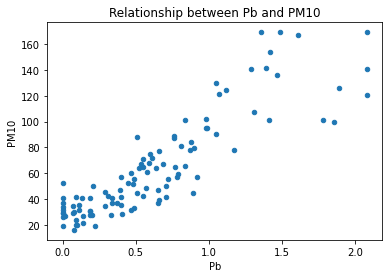

In [26]:
d1.plot.scatter(x='Pb',y='PM10',title='Relationship between Pb and PM10')

# Homoscedasicity

<AxesSubplot:xlabel='Fitted_value', ylabel='Residual'>

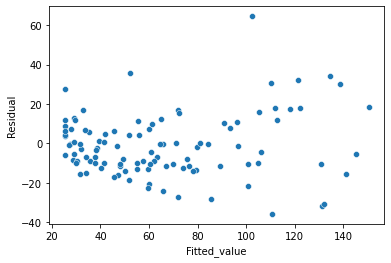

In [27]:
sns.scatterplot(x='Fitted_value',y='Residual',data=d1)

# Normality

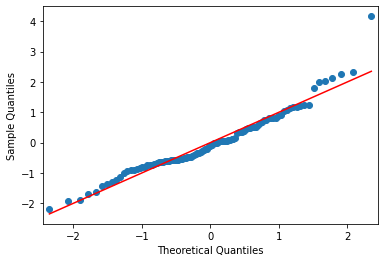

In [28]:
import statsmodels.api as sm
fig = sm.qqplot(d1['Residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# Model error as IID

<AxesSubplot:ylabel='Frequency'>

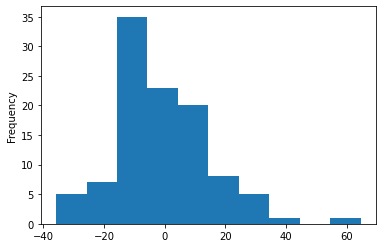

In [29]:
d1['Residual'].plot.hist()

# Prediction on test data

In [30]:
d1_test=pd.concat([X_test,y_test],axis=1)
d1_test.head()

,Pb,Cu,Cr,NOx,SO2,PM10
99,2.0825,1.2775,1.3225,40.61,22.84,169.0425
137,0.0000,0.0000,0.0000,13.21,9.08,61.8900
20,1.9700,0.9800,0.8200,87.73,32.14,110.4100
56,0.9800,0.0200,0.1900,49.19,29.14,97.0900
147,0.1000,0.0300,0.0900,47.56,24.14,40.3800


In [31]:
d1_test['Prediction']=model2.predict(d1_test)
d1_test.head()

,Pb,Cu,Cr,NOx,SO2,PM10,Prediction
99,2.0825,1.2775,1.3225,40.61,22.84,169.0425,165.208385
137,0.0000,0.0000,0.0000,13.21,9.08,61.8900,25.184507
20,1.9700,0.9800,0.8200,87.73,32.14,110.4100,136.909899
56,0.9800,0.0200,0.1900,49.19,29.14,97.0900,70.281561
147,0.1000,0.0300,0.0900,47.56,24.14,40.3800,33.182754


# Completed